# Data fields

- ClaimNumber: Unique policy identifier
- DateTimeOfAccident: Date and time of accident
- DateReported: Date that accident was reported
- Age: Age of worker
- Gender: Gender of worker
- MaritalStatus: Martial status of worker. (M)arried, (S)ingle, (U)nknown.
- DependentChildren: The number of dependent children
- DependentsOther: The number of dependants excluding children
- WeeklyWages: Total weekly wage
- PartTimeFullTime: Binary (P) or (F)
- HoursWorkedPerWeek: Total hours worked per week
- DaysWorkedPerWeek: Number of days worked per week
- ClaimDescription: Free text description of the claim
- InitialIncurredClaimCost: Initial estimate by the insurer of the claim cost
- UltimateIncurredClaimCost: Total claims payments by the insurance company. This is the field you are asked to predict in the test set.


import all libraries and modules required

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime
import datetime as dt
from wordcloud import WordCloud
import seaborn as sns
import sklearn.preprocessing as pre
import sklearn.linear_model as lm
import sklearn.model_selection as ms
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rmse
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

# Data_set

In [2]:
# load data sets
data = pd.read_csv("../input/data-for-train/train1.csv")
test = pd.read_csv("../input/machine-learning-24-hrs-hackathon/Test_SJC.csv")
sub = pd.read_csv("../input/machine-learning-24-hrs-hackathon/sample_submission.csv")

In [3]:
# idea of data distribution
print(data.info())
print(data.describe())
print(data.shape)
print(data.size)
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36176 entries, 0 to 36175
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                36176 non-null  object 
 1   DateTimeOfAccident         36176 non-null  object 
 2   DateReported               36176 non-null  object 
 3   Age                        36176 non-null  int64  
 4   Gender                     36176 non-null  object 
 5   MaritalStatus              36154 non-null  object 
 6   DependentChildren          36176 non-null  int64  
 7   DependentsOther            36176 non-null  int64  
 8   WeeklyWages                36120 non-null  float64
 9   PartTimeFullTime           36176 non-null  object 
 10  HoursWorkedPerWeek         36127 non-null  float64
 11  DaysWorkedPerWeek          36176 non-null  int64  
 12  ClaimDescription           36176 non-null  object 
 13  InitialIncurredCalimsCost  36176 non-null  int

# Data_Preprocessing

In [4]:
data.isnull().sum()

ClaimNumber                   0
DateTimeOfAccident            0
DateReported                  0
Age                           0
Gender                        0
MaritalStatus                22
DependentChildren             0
DependentsOther               0
WeeklyWages                  56
PartTimeFullTime              0
HoursWorkedPerWeek           49
DaysWorkedPerWeek             0
ClaimDescription              0
InitialIncurredCalimsCost     0
UltimateIncurredClaimCost     0
dtype: int64

In [5]:
data["MaritalStatus"].value_counts()

S    17450
M    15162
U     3542
Name: MaritalStatus, dtype: int64

In [6]:
data["WeeklyWages"].value_counts().nunique()

73

In [7]:
data["HoursWorkedPerWeek"].value_counts().nunique()

65

In [8]:
# Converting the date data to year only
data['DateTimeOfAccident']=pd.to_datetime(data['DateTimeOfAccident'],format="%Y-%m-%dT%H:%M:%S")
data["yearofAccident"] =data["DateTimeOfAccident"].dt.year
data["dayofweekAccident"] = data["DateTimeOfAccident"].dt.weekday
data['monthOfAccident'] =data['DateTimeOfAccident'].dt.month

In [9]:
data['DateReported']=pd.to_datetime(data['DateReported'],format="%Y-%m-%dT%H:%M:%S")
data["yearofReported"] =data["DateReported"].dt.year
data["dayofweekReported"] = data["DateReported"].dt.weekday
data['monthOfReported'] =data['DateReported'].dt.month

In [10]:
data['Difference_month_accident_and_reported'] = (data['yearofReported']-data['yearofAccident'])*12+(data['monthOfReported']-data['monthOfAccident'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36176 entries, 0 to 36175
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype              
---  ------                                  --------------  -----              
 0   ClaimNumber                             36176 non-null  object             
 1   DateTimeOfAccident                      36176 non-null  datetime64[ns, UTC]
 2   DateReported                            36176 non-null  datetime64[ns, UTC]
 3   Age                                     36176 non-null  int64              
 4   Gender                                  36176 non-null  object             
 5   MaritalStatus                           36154 non-null  object             
 6   DependentChildren                       36176 non-null  int64              
 7   DependentsOther                         36176 non-null  int64              
 8   WeeklyWages                             36120 non-null  float64            


## missing value imputation

In [12]:
data.columns

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender',
       'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages',
       'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'ClaimDescription', 'InitialIncurredCalimsCost',
       'UltimateIncurredClaimCost', 'yearofAccident', 'dayofweekAccident',
       'monthOfAccident', 'yearofReported', 'dayofweekReported',
       'monthOfReported', 'Difference_month_accident_and_reported'],
      dtype='object')

In [13]:
data.isnull().sum()

ClaimNumber                                0
DateTimeOfAccident                         0
DateReported                               0
Age                                        0
Gender                                     0
MaritalStatus                             22
DependentChildren                          0
DependentsOther                            0
WeeklyWages                               56
PartTimeFullTime                           0
HoursWorkedPerWeek                        49
DaysWorkedPerWeek                          0
ClaimDescription                           0
InitialIncurredCalimsCost                  0
UltimateIncurredClaimCost                  0
yearofAccident                             0
dayofweekAccident                          0
monthOfAccident                            0
yearofReported                             0
dayofweekReported                          0
monthOfReported                            0
Difference_month_accident_and_reported     0
dtype: int

In [14]:
data.isnull().sum()

ClaimNumber                                0
DateTimeOfAccident                         0
DateReported                               0
Age                                        0
Gender                                     0
MaritalStatus                             22
DependentChildren                          0
DependentsOther                            0
WeeklyWages                               56
PartTimeFullTime                           0
HoursWorkedPerWeek                        49
DaysWorkedPerWeek                          0
ClaimDescription                           0
InitialIncurredCalimsCost                  0
UltimateIncurredClaimCost                  0
yearofAccident                             0
dayofweekAccident                          0
monthOfAccident                            0
yearofReported                             0
dayofweekReported                          0
monthOfReported                            0
Difference_month_accident_and_reported     0
dtype: int

In [15]:
data["MaritalStatus"].value_counts()

S    17450
M    15162
U     3542
Name: MaritalStatus, dtype: int64

<AxesSubplot:>

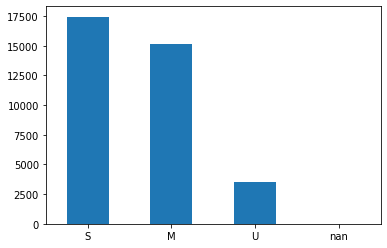

In [16]:
data['MaritalStatus'].value_counts(dropna = False).plot(kind = 'bar', rot = 0)

In [17]:
data['MaritalStatus'].fillna('U', inplace = True)

In [18]:
data.isnull().sum()

ClaimNumber                                0
DateTimeOfAccident                         0
DateReported                               0
Age                                        0
Gender                                     0
MaritalStatus                              0
DependentChildren                          0
DependentsOther                            0
WeeklyWages                               56
PartTimeFullTime                           0
HoursWorkedPerWeek                        49
DaysWorkedPerWeek                          0
ClaimDescription                           0
InitialIncurredCalimsCost                  0
UltimateIncurredClaimCost                  0
yearofAccident                             0
dayofweekAccident                          0
monthOfAccident                            0
yearofReported                             0
dayofweekReported                          0
monthOfReported                            0
Difference_month_accident_and_reported     0
dtype: int

In [19]:
data["WeeklyWages"].value_counts().unique()

array([8220, 2823,  374,  264,  239,  205,  135,  123,  108,   84,   82,
         80,   78,   77,   73,   72,   71,   70,   68,   65,   59,   58,
         57,   56,   55,   54,   53,   52,   51,   50,   49,   48,   46,
         44,   43,   42,   41,   38,   37,   35,   34,   33,   32,   30,
         29,   28,   27,   26,   25,   24,   23,   22,   21,   20,   19,
         18,   17,   16,   15,   14,   13,   12,   11,   10,    9,    8,
          7,    6,    5,    4,    3,    2,    1])

In [20]:
data = data.dropna()

In [21]:
print(data["WeeklyWages"].isnull().sum())
print(data["HoursWorkedPerWeek"].isnull().sum())

0
0


# EDA

<AxesSubplot:>

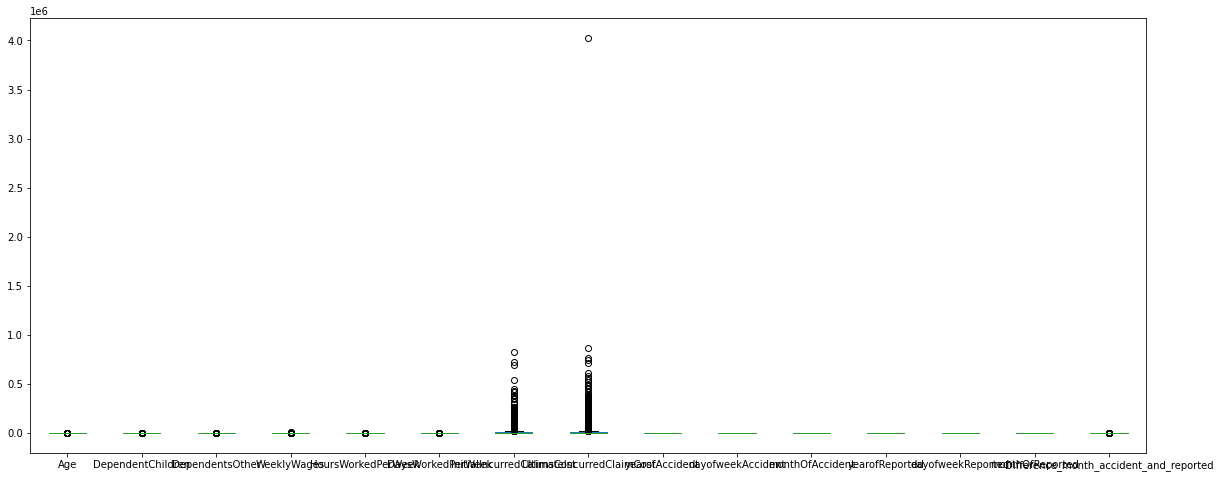

In [22]:
data.plot.box(figsize = (20,8))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

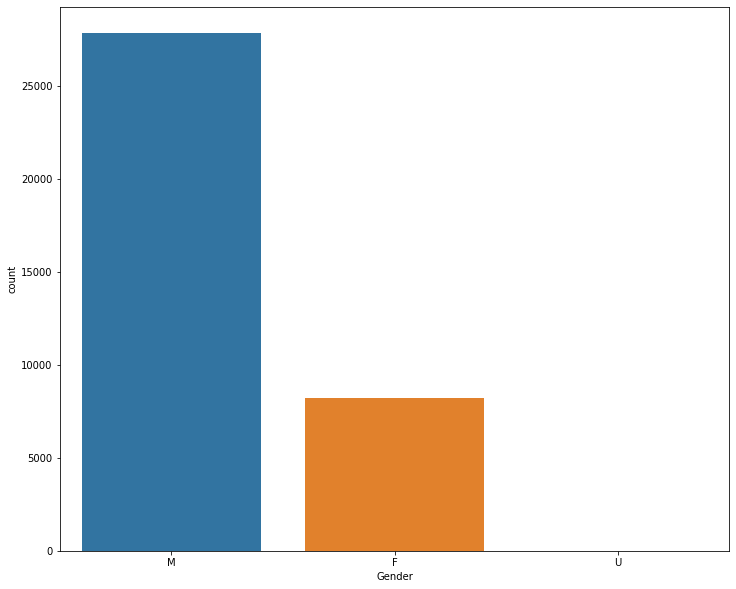

In [23]:
plt.figure(figsize = (12, 10))
sns.countplot(data["Gender"])

In [24]:
log_UltimateIncurredClaimCost=np.log(data['UltimateIncurredClaimCost'])

<AxesSubplot:xlabel='Gender', ylabel='UltimateIncurredClaimCost'>

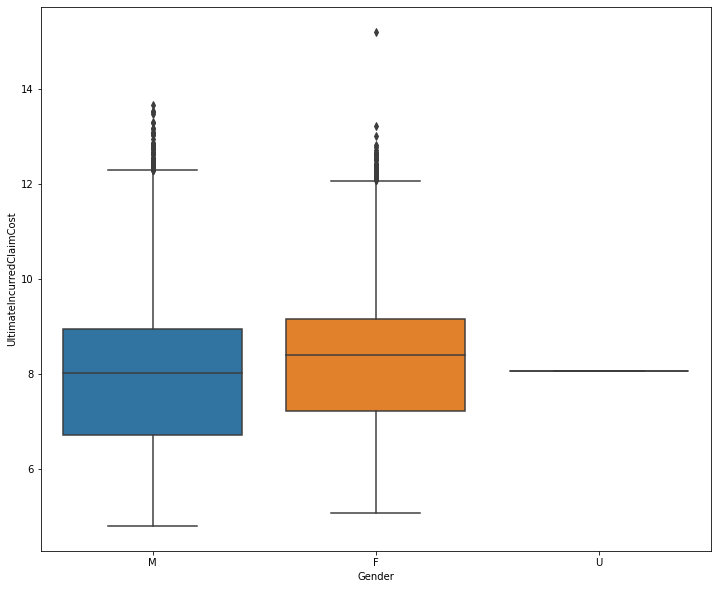

In [25]:
plt.figure(figsize = (12, 10))
sns.boxplot(x = 'Gender', y = log_UltimateIncurredClaimCost,  data =data)

 On average incurred claims cost female are the higer amount than male

In [26]:
data["Gender"].value_counts().unique()

array([27837,  8233,     1])

In [27]:
data.drop(data[ data['Gender'] == 'U' ].index, inplace = True)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

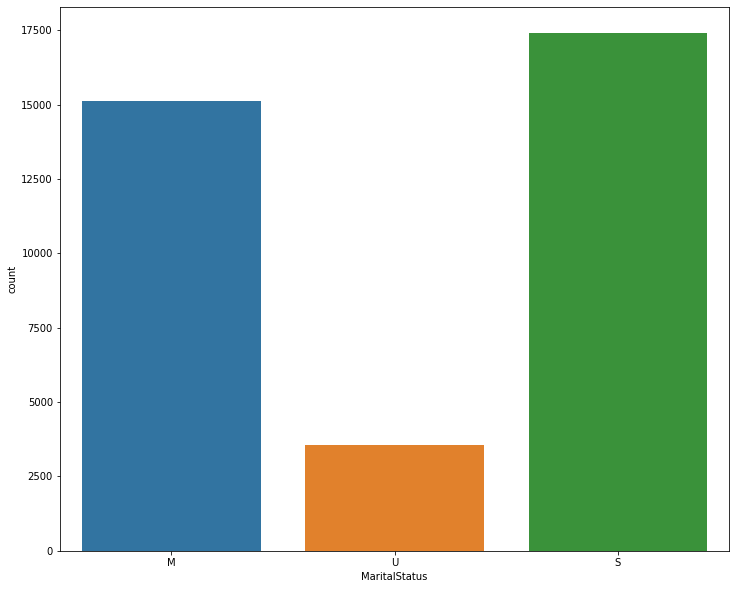

In [28]:
plt.figure(figsize = (12, 10))
sns.countplot(x = 'MaritalStatus',data =data)

<AxesSubplot:xlabel='MaritalStatus', ylabel='UltimateIncurredClaimCost'>

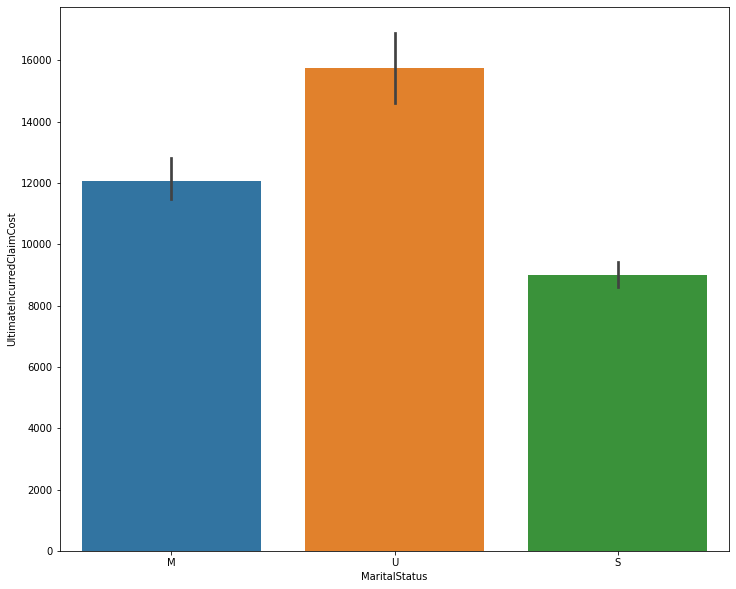

In [29]:
plt.figure(figsize=(12,10))
sns.barplot(x='MaritalStatus',y='UltimateIncurredClaimCost',data=data)

incurred claim cost are high, if the person is married 

<AxesSubplot:xlabel='DependentChildren', ylabel='count'>

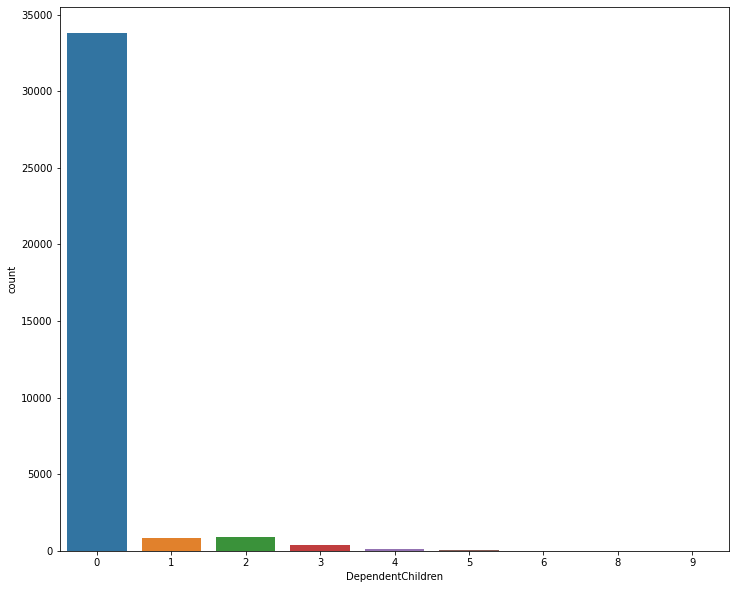

In [30]:
plt.figure(figsize = (12, 10))
sns.countplot(x = 'DependentChildren',data =data)

<AxesSubplot:xlabel='DependentChildren', ylabel='UltimateIncurredClaimCost'>

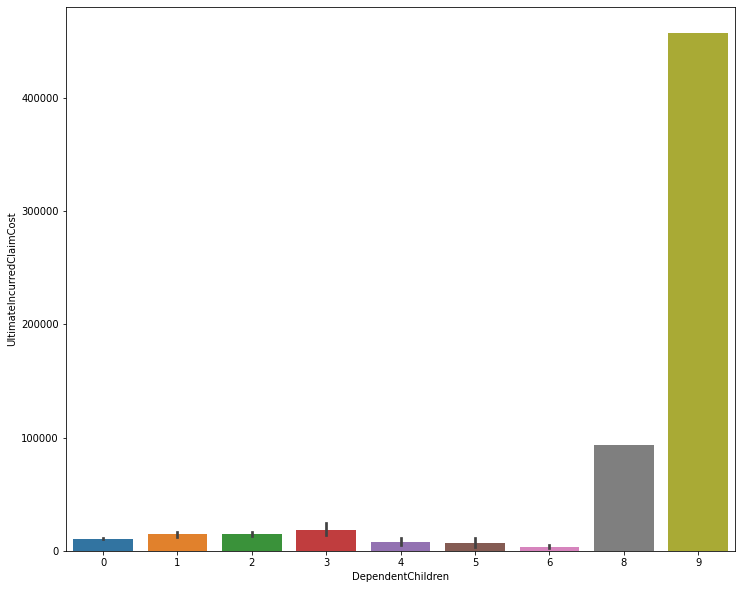

In [31]:
plt.figure(figsize=(12,10))
sns.barplot(x='DependentChildren',y='UltimateIncurredClaimCost',data=data)

if the number of children is high then the insurance claim will be high

<AxesSubplot:xlabel='DependentsOther', ylabel='count'>

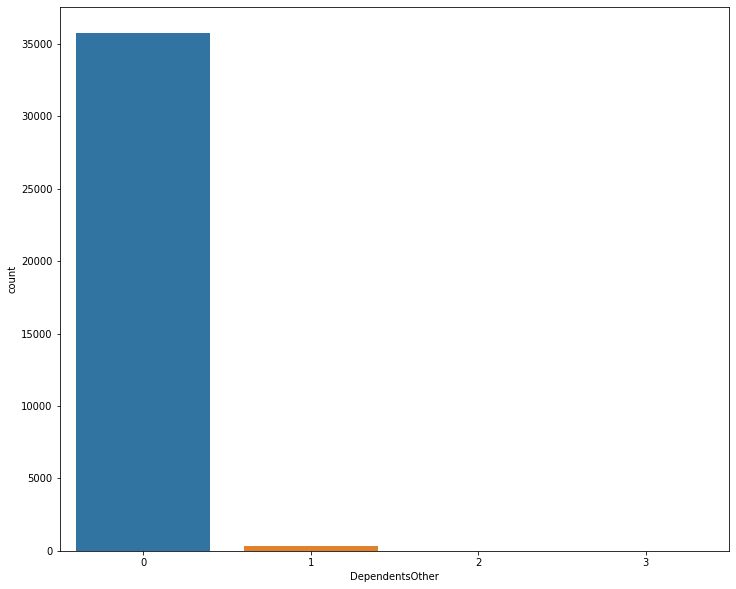

In [32]:
plt.figure(figsize = (12, 10))
sns.countplot(x='DependentsOther',data=data)

<AxesSubplot:xlabel='DependentsOther', ylabel='UltimateIncurredClaimCost'>

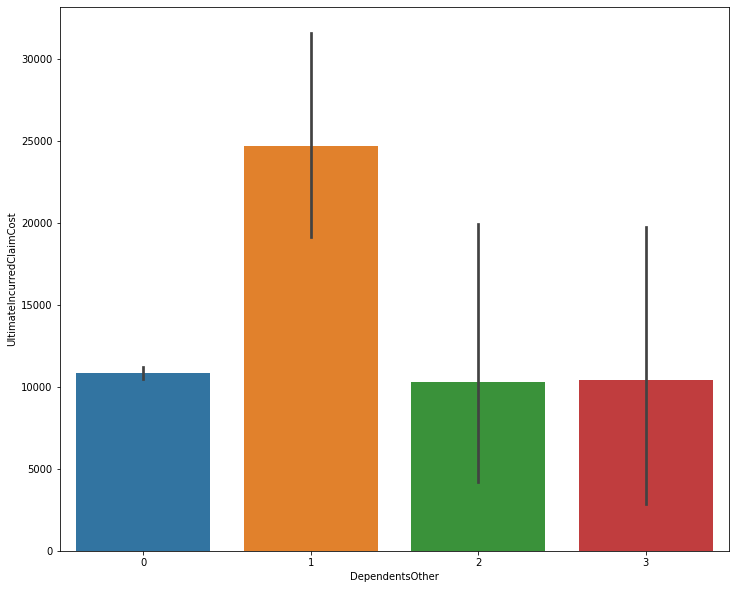

In [33]:
plt.figure(figsize=(12,10))
sns.barplot(x='DependentsOther',y='UltimateIncurredClaimCost',data=data)

number of dependent others also influence insurance claim cost, but if there is too many other dependent people the insurance claim will not increase significantly. 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='WeeklyWages'>

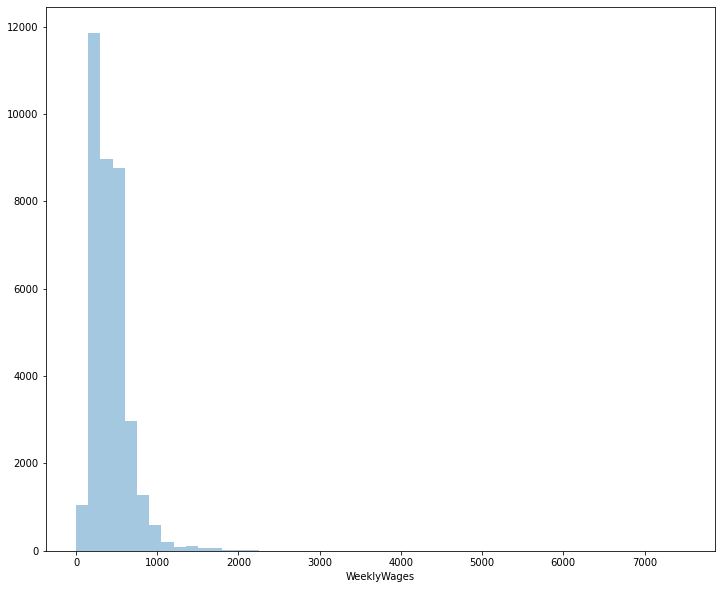

In [34]:
plt.figure(figsize = (12, 10))
sns.distplot(data['WeeklyWages'],rug=False, hist=True, kde = False)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PartTimeFullTime', ylabel='count'>

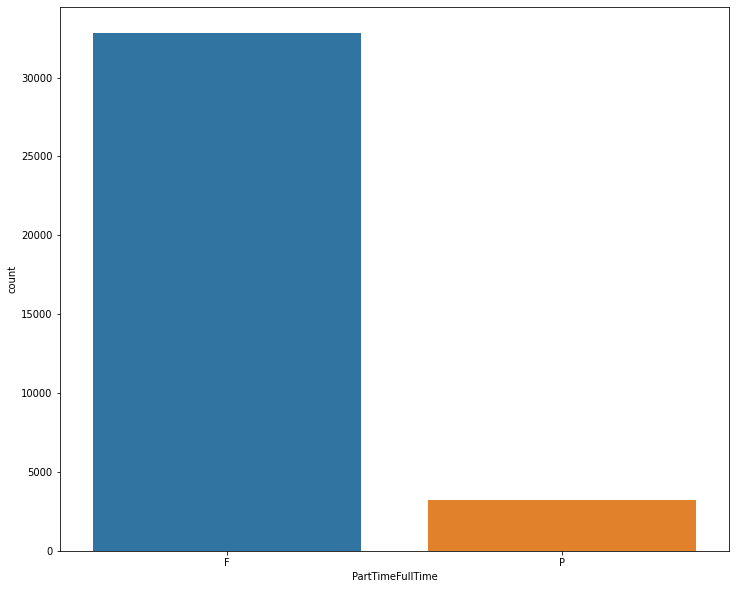

In [35]:
plt.figure(figsize = (12, 10))
sns.countplot(data.PartTimeFullTime)

<AxesSubplot:xlabel='PartTimeFullTime', ylabel='UltimateIncurredClaimCost'>

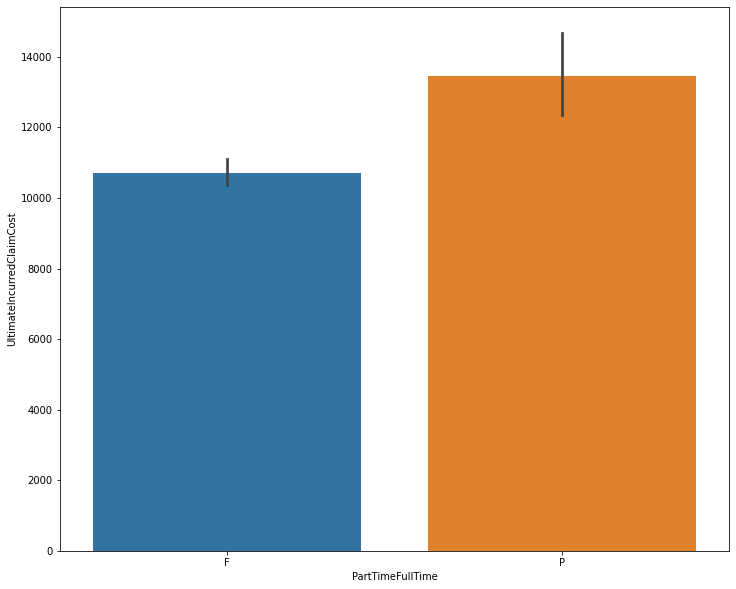

In [36]:
plt.figure(figsize=(12,10))
sns.barplot(x='PartTimeFullTime',y='UltimateIncurredClaimCost',data=data)

partime jobbers will have more insurance than full timers

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='InitialIncurredCalimsCost', ylabel='Density'>

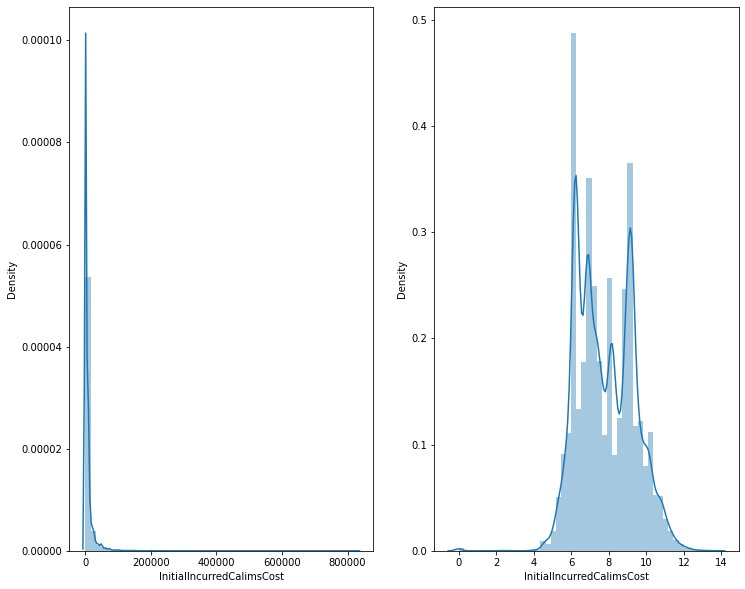

In [37]:
plt.figure(figsize = (12, 10))
plt.subplot(1, 2, 1)
sns.distplot(data.InitialIncurredCalimsCost, hist=True, rug=False)
plt.subplot(1, 2, 2)
sns.distplot(np.log(data.InitialIncurredCalimsCost), hist=True, rug=False)

<AxesSubplot:xlabel='Age', ylabel='UltimateIncurredClaimCost'>

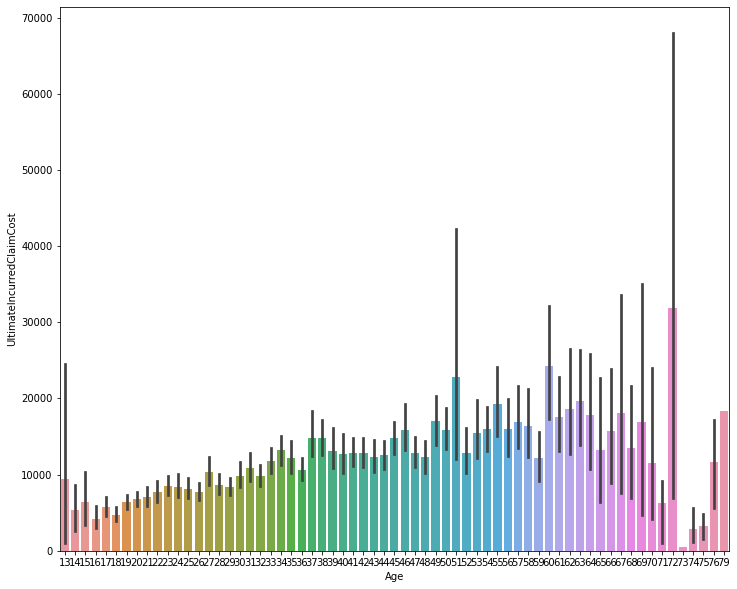

In [38]:
plt.figure(figsize=(12,10))
sns.barplot(x='Age',y='UltimateIncurredClaimCost',data=data)

the insurance will increase according to age, that is an elderly person will have a more amount as claim

<AxesSubplot:xlabel='DaysWorkedPerWeek', ylabel='UltimateIncurredClaimCost'>

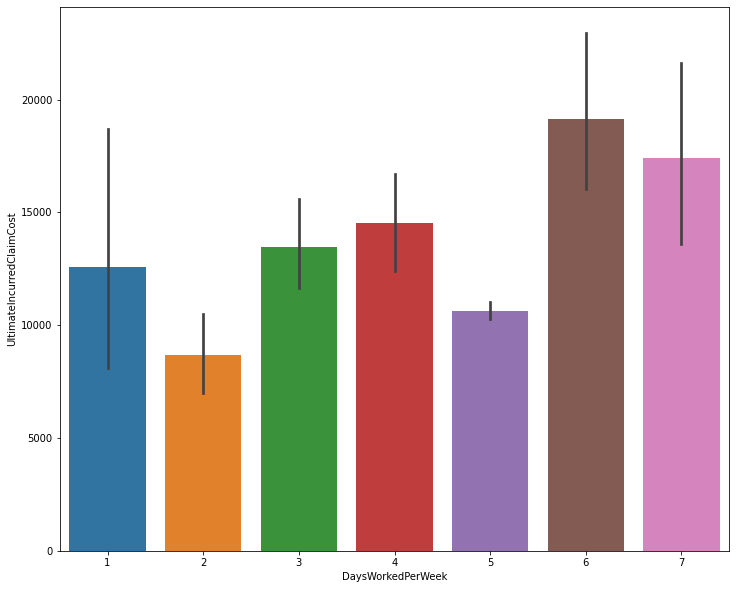

In [39]:
plt.figure(figsize=(12,10))
sns.barplot(x='DaysWorkedPerWeek',y='UltimateIncurredClaimCost',data=data)

6 day's worked per week more insurance clam cost

<AxesSubplot:xlabel='Difference_month_accident_and_reported', ylabel='UltimateIncurredClaimCost'>

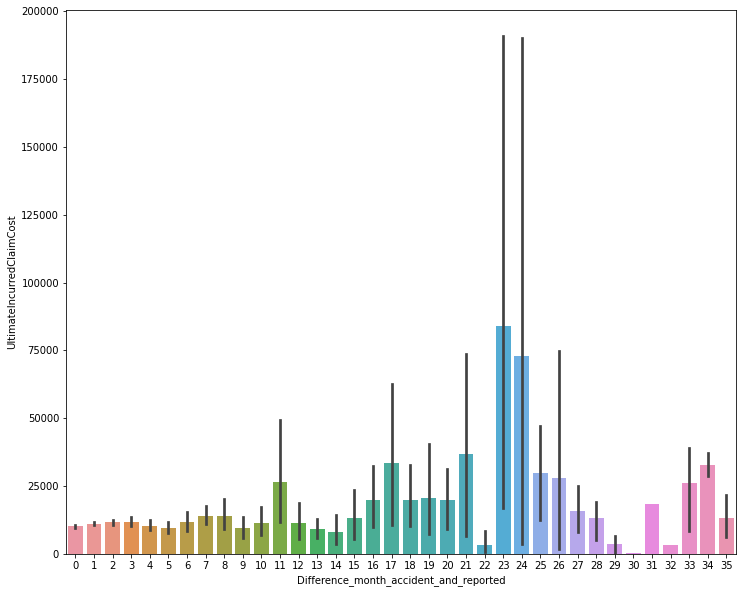

In [40]:
plt.figure(figsize=(12,10))
sns.barplot(x='Difference_month_accident_and_reported',y='UltimateIncurredClaimCost',data=data)

the insurance claim will be high if the difference is 2 years 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='WeeklyWages'>

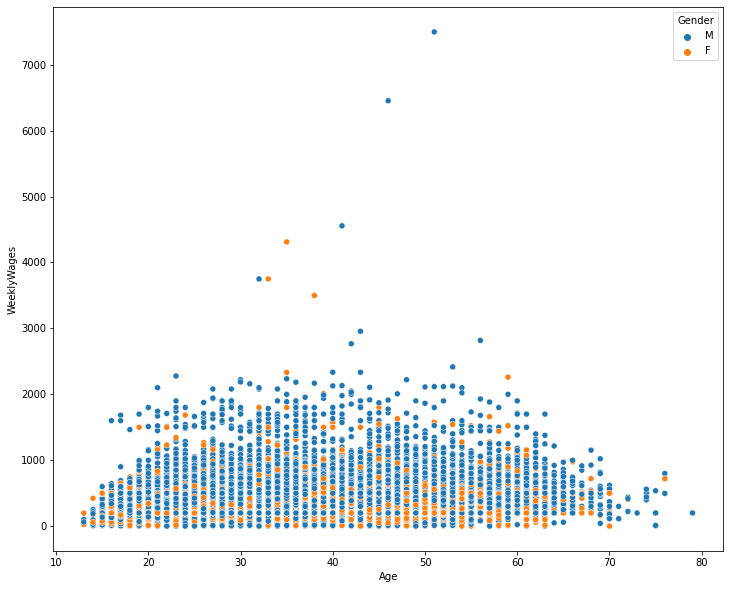

In [41]:
plt.figure(figsize = (12, 10))
sns.scatterplot(data["Age"],data["WeeklyWages"],hue = data["Gender"])

<AxesSubplot:xlabel='HoursWorkedPerWeek', ylabel='UltimateIncurredClaimCost'>

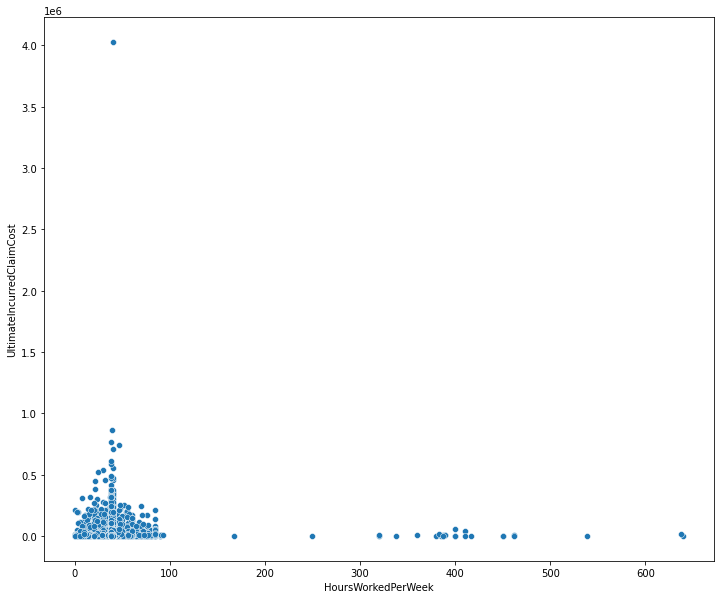

In [42]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='HoursWorkedPerWeek',y='UltimateIncurredClaimCost',data=data)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='WeeklyWages', ylabel='InitialIncurredCalimsCost'>

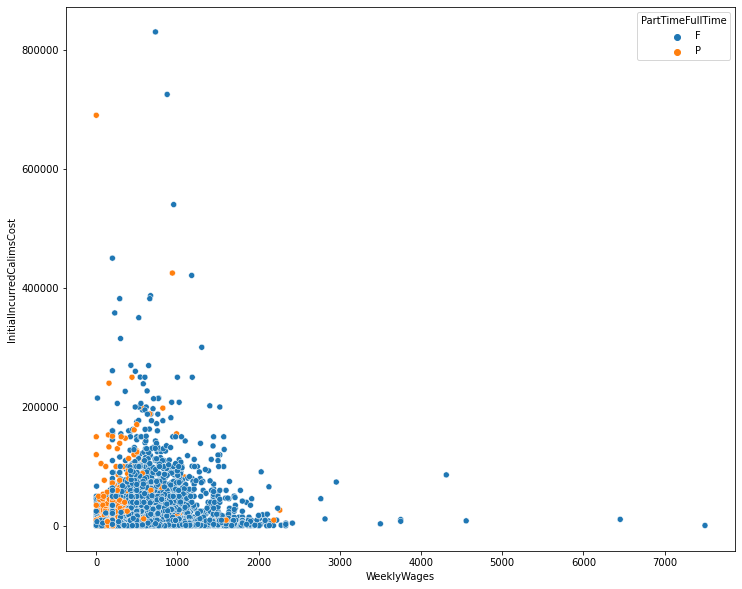

In [43]:
plt.figure(figsize = (12, 10))
sns.scatterplot(data["WeeklyWages"],data["InitialIncurredCalimsCost"],hue = data["PartTimeFullTime"])

<AxesSubplot:xlabel='WeeklyWages', ylabel='UltimateIncurredClaimCost'>

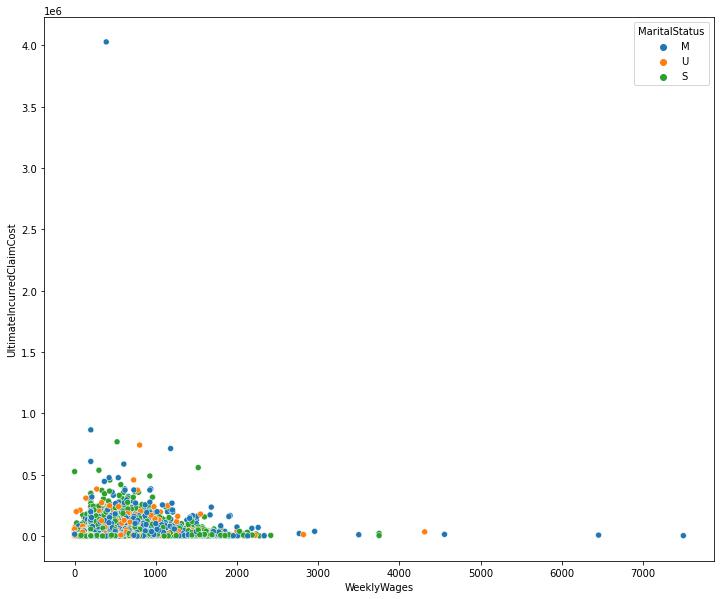

In [44]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='WeeklyWages',y='UltimateIncurredClaimCost',hue="MaritalStatus",data=data)

<AxesSubplot:>

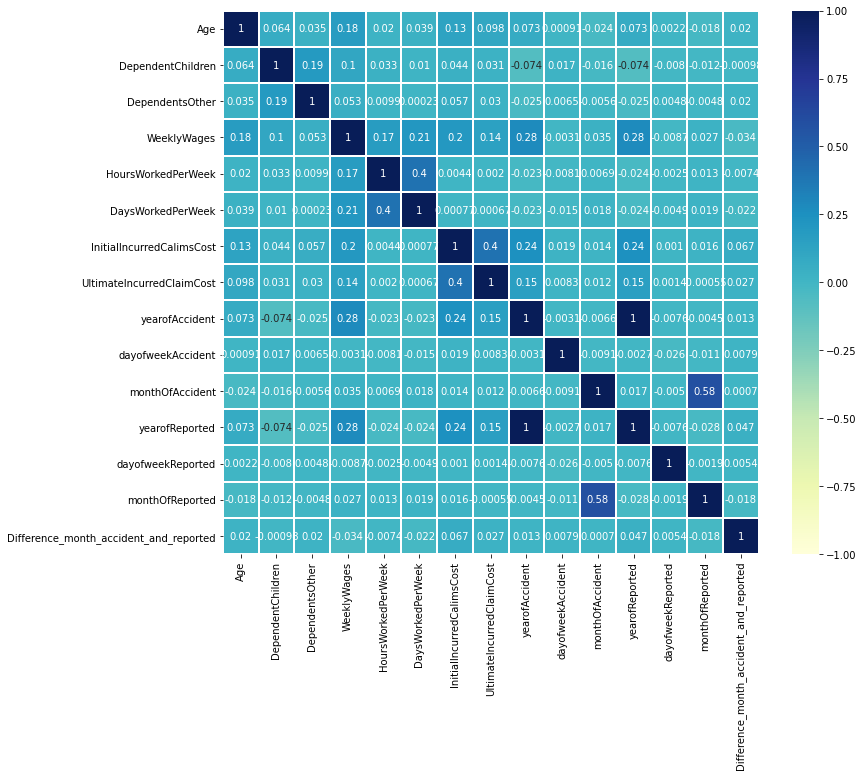

In [45]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True, 
            linewidth=2,ax = ax, 
            vmin = -1, vmax = 1, center = 0, 
            cmap="YlGnBu")

In [46]:
data=data.drop(['DateTimeOfAccident','DateReported','ClaimNumber','ClaimDescription','yearofAccident', 'dayofweekAccident',
       'monthOfAccident', 'yearofReported', 'dayofweekReported','monthOfReported'],axis=1)

In [47]:
data.corr()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Difference_month_accident_and_reported
Age,1.000000,0.064419,0.035096,0.176241,0.019523,0.038618,0.126476,0.098297,0.019929
DependentChildren,0.064419,1.000000,0.190803,0.101863,0.032813,0.010010,0.043514,0.031210,-0.000975
DependentsOther,0.035096,0.190803,1.000000,0.053362,0.009936,0.000234,0.056657,0.029975,0.019637
WeeklyWages,0.176241,0.101863,0.053362,1.000000,0.172884,0.208035,0.196759,0.140690,-0.033994
HoursWorkedPerWeek,0.019523,0.032813,0.009936,0.172884,1.000000,0.399128,0.004438,0.001979,-0.007353
DaysWorkedPerWeek,0.038618,0.010010,0.000234,0.208035,0.399128,1.000000,0.000773,0.000673,-0.021961
InitialIncurredCalimsCost,0.126476,0.043514,0.056657,0.196759,0.004438,0.000773,1.000000,0.402021,0.067464
UltimateIncurredClaimCost,0.098297,0.031210,0.029975,0.140690,0.001979,0.000673,0.402021,1.000000,0.026601
Difference_month_accident_and_reported,0.019929,-0.000975,0.019637,-0.033994,-0.007353,-0.021961,0.067464,0.026601,1.000000


<AxesSubplot:>

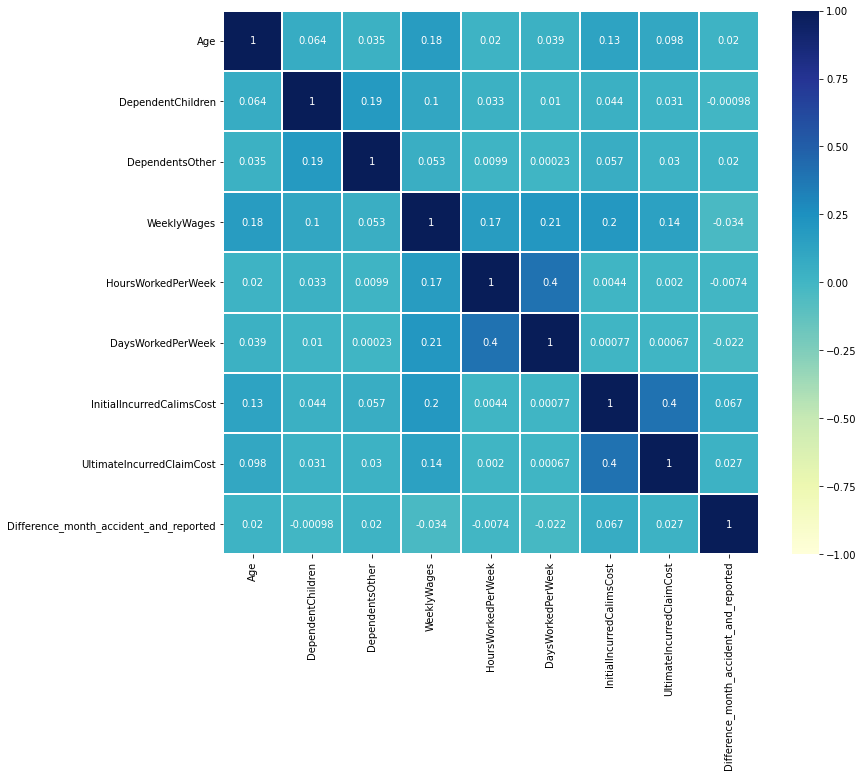

In [48]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, 
            linewidth=2,ax = ax, 
            vmin = -1, vmax = 1, center = 0, 
            cmap="YlGnBu")

# Data Modelling

### normalization 
### feature and outcome
### train test dataset
### ml model

# Linear Regression

In [49]:
data_copy = data

In [50]:
le = pre.LabelEncoder()
regressor = lm.LinearRegression()

for x in data.select_dtypes(include = "object").columns:
    data[x] = le.fit_transform(data[x])

x = pre.minmax_scale(data.drop("UltimateIncurredClaimCost",axis =1))
y = data["UltimateIncurredClaimCost"]

In [51]:
x_train,x_test,y_train,y_test = ms.train_test_split(x,y,random_state = 12345,test_size = 0.3)
reg = regressor.fit(x_train,y_train)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))
y_pred = reg.predict(x_test)
print("rmse = ",rmse(y_test,y_pred,squared = False))

0.14804362027069196
0.23643698621007614
rmse =  26461.6089742833


In [52]:
x_train,x_test,y_train,y_test = ms.train_test_split(x,y,random_state = 2020,test_size = 0.3)
reg = regressor.fit(x_train,y_train)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))
y_predict = reg.predict(x_test)
print("rmse = ",rmse(y_test,y_pred,squared = False))

0.14865986240992013
0.25150178072150053
rmse =  31977.52695638798


In [53]:
x_train,x_test,y_train,y_test = ms.train_test_split(x,y,random_state = 12345,test_size = 0.4)
reg = regressor.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print("rmse = ",rmse(y_test,y_pred,squared = False))

rmse =  25777.18831451622


In [54]:
x_train,x_test,y_train,y_test = ms.train_test_split(x,y,random_state = 2020,test_size = 0.3)
reg = regressor.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print("rmse = ",rmse(y_test,y_pred,squared = False))

rmse =  23789.31680468135


In [55]:
reg.coef_

array([ 7.94174413e+03, -1.68831158e+03,  1.24374232e+03,  6.38753296e+03,
        1.96316102e+03,  6.44009581e+04,  1.11278009e+03, -7.98536436e+03,
        1.42942865e+02,  6.51116216e+05, -6.63824602e+01])

In [56]:
data.columns

Index(['Age', 'Gender', 'MaritalStatus', 'DependentChildren',
       'DependentsOther', 'WeeklyWages', 'PartTimeFullTime',
       'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'InitialIncurredCalimsCost',
       'UltimateIncurredClaimCost', 'Difference_month_accident_and_reported'],
      dtype='object')

In [57]:
datax=['Age','MaritalStatus','DependentChildren','DependentsOther', 
            'WeeklyWages', 'PartTimeFullTime',
            'DaysWorkedPerWeek','InitialIncurredCalimsCost']

In [58]:
data = data[datax]

In [59]:
for x in data.select_dtypes(include = "object").columns:
    data[x] = le.fit_transform(data[x])
x = pre.minmax_scale(data)
x_train,x_test,y_train,y_test = ms.train_test_split(x,y,random_state = 2020,test_size = 0.3)
reg = regressor.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print("rmse = ",rmse(y_test,y_pred,squared = False))

rmse =  23791.551098673048


In [60]:
reg.coef_

array([ 8.21641163e+03,  1.21407997e+03,  6.25508361e+03,  1.54692121e+03,
        6.19085661e+04,  1.76207278e+03, -4.14300032e+02,  6.52004071e+05])

In [61]:
data.columns

Index(['Age', 'MaritalStatus', 'DependentChildren', 'DependentsOther',
       'WeeklyWages', 'PartTimeFullTime', 'DaysWorkedPerWeek',
       'InitialIncurredCalimsCost'],
      dtype='object')

In [62]:
datax=['Age','MaritalStatus','DependentChildren','DependentsOther', 
            'WeeklyWages', 'PartTimeFullTime',
            'InitialIncurredCalimsCost']

In [63]:
data = data[datax]

In [64]:
for x in data.select_dtypes(include = "object").columns:
    data[x] = le.fit_transform(data[x])
x = pre.minmax_scale(data)
x_train,x_test,y_train,y_test = ms.train_test_split(x,y,random_state = 2020,test_size = 0.3)
reg = regressor.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print("rmse = ",rmse(y_test,y_pred,squared = False))
reg.coef_

rmse =  23792.072000306474


array([  8215.42815514,   1215.72617155,   6260.49417505,   1556.13478971,
        61766.69236366,   1839.67269761, 652013.0620261 ])

## Regularization

In [65]:
ridge = Ridge(alpha = 0.5,normalize = True)
ridge.fit(x_train,y_train)
predict = ridge.predict(x_test)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))
print("rmse = ",rmse(y_test,predict,squared = False))

0.148322862540195
0.2513283937799651
rmse =  23850.303149331707


In [66]:
ridge = Ridge(alpha = 20,normalize = True)
ridge.fit(x_train,y_train)
predict = ridge.predict(x_test)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))
print("rmse = ",rmse(y_test,predict,squared = False))

0.148322862540195
0.2513283937799651
rmse =  27062.875507587683


In [67]:
lasso = Lasso(alpha = 0.5,normalize = True)
lasso.fit(x_train,y_train)
predict = lasso.predict(x_test)
error = np.mean((predict - y_test)**2)
print(error)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))
print("rmse = ",rmse(y_test,predict,squared = False))

565792908.7462525
0.148322862540195
0.2513283937799651
rmse =  23786.401761221758


In [68]:
lasso = Lasso(alpha = 10,normalize = True)
lasso.fit(x_train,y_train)
predict = lasso.predict(x_test)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))
print("rmse = ",rmse(y_test,predict,squared = False))

0.148322862540195
0.2513283937799651
rmse =  23777.477785757495


In [69]:
lasso = Lasso(alpha = 20,normalize = True)
lasso.fit(x_train,y_train)
predict = lasso.predict(x_test)
print("rmse = ",rmse(y_test,predict,squared = False))

rmse =  23874.095630548356


# Random Forest

In [70]:
data_copy1 = data_copy
data_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36070 entries, 0 to 36175
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     36070 non-null  int64  
 1   Gender                                  36070 non-null  int64  
 2   MaritalStatus                           36070 non-null  int64  
 3   DependentChildren                       36070 non-null  int64  
 4   DependentsOther                         36070 non-null  int64  
 5   WeeklyWages                             36070 non-null  float64
 6   PartTimeFullTime                        36070 non-null  int64  
 7   HoursWorkedPerWeek                      36070 non-null  float64
 8   DaysWorkedPerWeek                       36070 non-null  int64  
 9   InitialIncurredCalimsCost               36070 non-null  int64  
 10  UltimateIncurredClaimCost               36070 non-null  fl

In [71]:
x = pre.minmax_scale(data_copy1.drop("UltimateIncurredClaimCost",axis =1))
y = data_copy1["UltimateIncurredClaimCost"]
x_train,x_test,y_train,y_test = ms.train_test_split(x,y,random_state = 12345,test_size = 0.3)
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 12345)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)
print(rf_regressor.score(x_train,y_train))
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)
print("rmse = ",rmse(y_test,y_pred,squared = False))

0.6993847186026483
r2 score : 0.0162113043174279
rmse =  30036.181486710848


In [72]:
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 1)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)
print(rf_regressor.score(x_train,y_train))
print("rmse = ",rmse(y_test,y_pred,squared = False))

0.8417375915678403
rmse =  30868.506340226537


In [73]:
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)
print(rf_regressor.score(x_train,y_train))
print("rmse = ",rmse(y_test,y_pred,squared = False))

0.7659440859721177
rmse =  32644.47814233909


In [74]:
model=rf_regressor.fit(x_train, y_train)
model.feature_importances_
dict(zip(data_copy1,model.feature_importances_))

{'Age': 0.11606549773979932,
 'Gender': 0.038220093138441054,
 'MaritalStatus': 0.02062974958626678,
 'DependentChildren': 0.010054413096139098,
 'DependentsOther': 0.0011882391210958168,
 'WeeklyWages': 0.30535641276657377,
 'PartTimeFullTime': 0.004981143781130698,
 'HoursWorkedPerWeek': 0.10636163350576691,
 'DaysWorkedPerWeek': 0.007778239242184055,
 'InitialIncurredCalimsCost': 0.3094566185106986,
 'UltimateIncurredClaimCost': 0.07990795951190385}

In [75]:
feature=['Age','MaritalStatus','DependentChildren','DependentsOther', 
            'WeeklyWages', 'PartTimeFullTime',
            'InitialIncurredCalimsCost']

In [76]:
data = data_copy1[feature]

In [77]:
x = pre.minmax_scale(data)
y = data_copy1["UltimateIncurredClaimCost"]
x_train,x_test,y_train,y_test = ms.train_test_split(x,y,random_state = 12345,test_size = 0.3)
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 12345)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)
print(rf_regressor.score(x_train,y_train))
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)
print("rmse = ",rmse(y_test,y_pred,squared = False))

0.7063186524937356
r2 score : 0.11020435641249227
rmse =  28565.31012161055


## hyper parameter tuning

In [78]:
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None],
    "random_state":[10,124,456,2345,234564],
    "max_features":["auto","sqrt","log2"]
}

In [79]:
rfr=RandomForestRegressor()
cv = GridSearchCV(rfr,parameters,cv=5)
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 10, 50, 100, 250],
                         'random_state': [10, 124, 456, 2345, 234564]})

In [80]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    print("mean_score =", results.cv_results_['mean_test_score'])
    print("std_score =", results.cv_results_['std_test_score'])
    print("params =", results.cv_results_['params'])

In [81]:
display(cv)

Best parameters are: {'max_depth': 2, 'max_features': 'auto', 'n_estimators': 250, 'random_state': 234564}


mean_score = [ 2.41446403e-01  2.42185073e-01  2.40994107e-01  2.44329575e-01
  2.41501148e-01  2.43258294e-01  2.44039506e-01  2.44229536e-01
  2.44069739e-01  2.43168468e-01  2.44646176e-01  2.46194996e-01
  2.44787191e-01  2.45228154e-01  2.44771364e-01  2.45024534e-01
  2.46093416e-01  2.45216352e-01  2.44908886e-01  2.46022466e-01
  2.45666476e-01  2.46049703e-01  2.45291604e-01  2.46127395e-01
  2.46265814e-01  1.75866573e-01  8.59454727e-02  8.91559642e-02
  1.81665455e-01  1.55927711e-01  1.44315664e-01  1.27571273e-01
  1.26769774e-01  1.60544428e-01  1.05199608e-01  1.36611678e-01
  1.57024114e-01  1.40730837e-01  1.59789058e-01  1.45725487e-01
  1.45497272e-01  1.53289685e-01  1.59568882e-01  1.55699336e-01
  1.57712023e-01  1.60550184e-01  1.56269423e-01  1.65284453e-01
  1.59736262e-01  1.61966540e-01  1.75866573e-01  8.59454727e-02
  8.91559642e-02  1.81665455e-01 

In [82]:
rf_regressor = RandomForestRegressor(n_estimators = 250, max_depth = 2,max_features = "auto",random_state = 234564)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)
print(rf_regressor.score(x_train,y_train))
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)
print("rmse = ",rmse(y_test,y_pred,squared = False))

0.17095172639233192
r2 score : 0.27979195796604117
rmse =  25699.38846239793


# Decision Tree Regressor

In [83]:
data_copy2 = data_copy
data_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36070 entries, 0 to 36175
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     36070 non-null  int64  
 1   Gender                                  36070 non-null  int64  
 2   MaritalStatus                           36070 non-null  int64  
 3   DependentChildren                       36070 non-null  int64  
 4   DependentsOther                         36070 non-null  int64  
 5   WeeklyWages                             36070 non-null  float64
 6   PartTimeFullTime                        36070 non-null  int64  
 7   HoursWorkedPerWeek                      36070 non-null  float64
 8   DaysWorkedPerWeek                       36070 non-null  int64  
 9   InitialIncurredCalimsCost               36070 non-null  int64  
 10  UltimateIncurredClaimCost               36070 non-null  fl

In [84]:
x = pre.minmax_scale(data_copy2.drop("UltimateIncurredClaimCost",axis =1))
y = data_copy2["UltimateIncurredClaimCost"]
x_train,x_test,y_train,y_test = ms.train_test_split(x,y,random_state = 12345,test_size = 0.3)
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(model.score(x_train,y_train))
print("rmse = ",rmse(y_test,y_pred,squared = False))

0.996629029139935
rmse =  52354.49251079093


In [85]:
data = data_copy2[feature]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36070 entries, 0 to 36175
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        36070 non-null  int64  
 1   MaritalStatus              36070 non-null  int64  
 2   DependentChildren          36070 non-null  int64  
 3   DependentsOther            36070 non-null  int64  
 4   WeeklyWages                36070 non-null  float64
 5   PartTimeFullTime           36070 non-null  int64  
 6   InitialIncurredCalimsCost  36070 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 3.2 MB


In [86]:
x = pre.minmax_scale(data)
x_train,x_test,y_train,y_test = ms.train_test_split(x,y,random_state = 12345,test_size = 0.3)
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(model.score(x_train,y_train))
print("rmse = ",rmse(y_test,y_pred,squared = False))

0.9870039430411255
rmse =  33232.80178508927


# Gradient Boost

In [87]:
data_copy3 = data_copy
data_copy3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36070 entries, 0 to 36175
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     36070 non-null  int64  
 1   Gender                                  36070 non-null  int64  
 2   MaritalStatus                           36070 non-null  int64  
 3   DependentChildren                       36070 non-null  int64  
 4   DependentsOther                         36070 non-null  int64  
 5   WeeklyWages                             36070 non-null  float64
 6   PartTimeFullTime                        36070 non-null  int64  
 7   HoursWorkedPerWeek                      36070 non-null  float64
 8   DaysWorkedPerWeek                       36070 non-null  int64  
 9   InitialIncurredCalimsCost               36070 non-null  int64  
 10  UltimateIncurredClaimCost               36070 non-null  fl

In [88]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)
print('Train score:', mean_squared_error(y_pred = GBR.predict(x_test) , y_true = y_test, squared= False))
print('test score:', mean_squared_error(y_pred = GBR.predict(x_test) , y_true = y_test, squared= False))

Train score: 26515.644814346906
test score: 26515.644814346906


# light gradient boosting

In [89]:
data_copy4 = data_copy

In [90]:
from lightgbm import LGBMRegressor

test_col = ['Age','MaritalStatus','DependentChildren','DependentsOther', 
            'WeeklyWages', 'PartTimeFullTime',
            'InitialIncurredCalimsCost']
data = data_copy4[test_col]

x = pre.minmax_scale(data)
y = data_copy1["UltimateIncurredClaimCost"]
x_train,x_test,y_train,y_test = ms.train_test_split(x,y,random_state = 12345,test_size = 0.3)

lgbm = LGBMRegressor(
               objective = 'regression', 
               num_leaves = 4,
               learning_rate = 0.01, 
               n_estimators = 10000,
               max_bin = 200, 
               bagging_fraction = 0.75,
               bagging_freq = 5, 
               bagging_seed = 7,
               feature_fraction = 0.2,
               feature_fraction_seed = 7,
               verbose = 1,
            )

lgbm_model = lgbm.fit(x_train, y_train)
lg_vpreds = lgbm_model.predict(x_test)
print((f"LGBM RMSE: {np.sqrt(mean_squared_error(y_test, lg_vpreds))}"))

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 25249, number of used features: 7
[LightGB

In [91]:
data_copy4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36070 entries, 0 to 36175
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     36070 non-null  int64  
 1   Gender                                  36070 non-null  int64  
 2   MaritalStatus                           36070 non-null  int64  
 3   DependentChildren                       36070 non-null  int64  
 4   DependentsOther                         36070 non-null  int64  
 5   WeeklyWages                             36070 non-null  float64
 6   PartTimeFullTime                        36070 non-null  int64  
 7   HoursWorkedPerWeek                      36070 non-null  float64
 8   DaysWorkedPerWeek                       36070 non-null  int64  
 9   InitialIncurredCalimsCost               36070 non-null  int64  
 10  UltimateIncurredClaimCost               36070 non-null  fl

In [92]:
data_copy4.describe()

,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Difference_month_accident_and_reported
count,36070.000000,36070.000000,36070.000000,36070.000000,36070.000000,36070.000000,36070.000000,36070.000000,36070.000000,36070.000000,3.607000e+04,36070.000000
mean,33.794677,0.771749,0.679484,0.121209,0.009565,416.508901,0.090103,37.767671,4.905822,7746.566704,1.095927e+04,1.274328
std,12.117677,0.419711,0.644009,0.525068,0.106317,243.948355,0.286333,12.502551,0.547276,18231.512131,3.533794e+04,2.023295
min,13.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.218868e+02,0.000000
25%,23.000000,1.000000,0.000000,0.000000,0.000000,200.000000,0.000000,38.000000,5.000000,700.000000,9.264270e+02,0.000000
50%,32.000000,1.000000,1.000000,0.000000,0.000000,393.465000,0.000000,38.000000,5.000000,2000.000000,3.372653e+03,1.000000
75%,43.000000,1.000000,1.000000,0.000000,0.000000,500.000000,0.000000,40.000000,5.000000,9500.000000,8.187468e+03,1.000000
max,79.000000,1.000000,2.000000,9.000000,3.000000,7497.000000,1.000000,640.000000,7.000000,830000.000000,4.027136e+06,35.000000


<AxesSubplot:xlabel='InitialIncurredCalimsCost'>

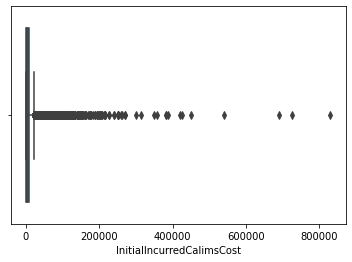

In [93]:
sns.boxplot(x = "InitialIncurredCalimsCost",data = data_copy4)

In [94]:
data = data_copy4

In [95]:
data=data[data["InitialIncurredCalimsCost"]<100000]
data

,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Difference_month_accident_and_reported
0,48,1,0,0,0,500.00,0,38.0,5,1500,4748.203388,3
1,43,0,0,0,0,509.34,0,37.5,5,5500,6326.285819,0
2,30,1,2,0,0,709.10,0,38.0,5,1700,2293.949087,1
3,41,1,1,0,0,555.46,0,38.0,5,15000,17786.487170,1
4,36,1,0,0,0,377.10,0,38.0,5,2800,4014.002925,1
...,...,...,...,...,...,...,...,...,...,...,...,...
36171,20,0,1,0,0,344.16,0,40.0,5,1400,1343.054886,1
36172,35,1,0,0,0,1668.83,0,71.0,7,1000,172876.632600,4
36173,52,0,0,0,0,204.87,1,20.0,4,500,632.281472,2
36174,28,1,0,0,0,730.87,0,38.0,5,4000,6714.495760,1


In [96]:
test_col = ['Age','MaritalStatus','DependentChildren','DependentsOther', 
            'WeeklyWages', 'PartTimeFullTime',
            'InitialIncurredCalimsCost']
data1 = data[test_col]

x = pre.minmax_scale(data1)
y = data['UltimateIncurredClaimCost']
x_train,x_test,y_train,y_test = ms.train_test_split(x,y,random_state = 12345,test_size = 0.3)

lgbm = LGBMRegressor(
               objective = 'regression', 
               num_leaves = 4,
               learning_rate = 0.01, 
               n_estimators = 10000,
               max_bin = 200, 
               bagging_fraction = 0.75,
               bagging_freq = 5, 
               bagging_seed = 7,
               feature_fraction = 0.2,
               feature_fraction_seed = 7,
               verbose = 1,
            )

lgbm_model1 = lgbm.fit(x_train, y_train)
lg_vpreds1 = lgbm_model.predict(x_test)
print((f"LGBM RMSE: {np.sqrt(mean_squared_error(y_test, lg_vpreds1))}"))

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001507 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 25104, number of used features: 7
[LightGB

# TEST DATA

In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17824 entries, 0 to 17823
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                17824 non-null  object 
 1   DateTimeOfAccident         17824 non-null  object 
 2   DateReported               17824 non-null  object 
 3   Age                        17824 non-null  int64  
 4   Gender                     17824 non-null  object 
 5   MaritalStatus              17817 non-null  object 
 6   DependentChildren          17824 non-null  int64  
 7   DependentsOther            17824 non-null  int64  
 8   WeeklyWages                17824 non-null  float64
 9   PartTimeFullTime           17824 non-null  object 
 10  HoursWorkedPerWeek         17824 non-null  float64
 11  DaysWorkedPerWeek          17824 non-null  int64  
 12  ClaimDescription           17824 non-null  object 
 13  InitialIncurredCalimsCost  17824 non-null  int

In [98]:
test.isnull().sum()

ClaimNumber                  0
DateTimeOfAccident           0
DateReported                 0
Age                          0
Gender                       0
MaritalStatus                7
DependentChildren            0
DependentsOther              0
WeeklyWages                  0
PartTimeFullTime             0
HoursWorkedPerWeek           0
DaysWorkedPerWeek            0
ClaimDescription             0
InitialIncurredCalimsCost    0
dtype: int64

In [99]:
test["MaritalStatus"].value_counts()

S    8711
M    7354
U    1752
Name: MaritalStatus, dtype: int64

<AxesSubplot:>

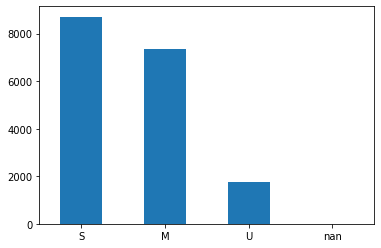

In [100]:
test['MaritalStatus'].value_counts(dropna = False).plot(kind = 'bar', rot = 0)

In [101]:
test['MaritalStatus'].fillna('U', inplace = True)

In [102]:
test.isnull().sum()

ClaimNumber                  0
DateTimeOfAccident           0
DateReported                 0
Age                          0
Gender                       0
MaritalStatus                0
DependentChildren            0
DependentsOther              0
WeeklyWages                  0
PartTimeFullTime             0
HoursWorkedPerWeek           0
DaysWorkedPerWeek            0
ClaimDescription             0
InitialIncurredCalimsCost    0
dtype: int64

In [103]:
test['Gender'].value_counts()

M    13741
F     4082
U        1
Name: Gender, dtype: int64

In [104]:
test.columns

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender',
       'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages',
       'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'ClaimDescription', 'InitialIncurredCalimsCost'],
      dtype='object')

In [105]:
test['DateTimeOfAccident']=pd.to_datetime(test['DateTimeOfAccident'],format="%Y-%m-%dT%H:%M:%S")
test["yearofAccident"] =test["DateTimeOfAccident"].dt.year
test["dayofweekAccident"] = test["DateTimeOfAccident"].dt.weekday
test['monthOfAccident'] =test['DateTimeOfAccident'].dt.month

In [106]:
test['DateReported']=pd.to_datetime(test['DateReported'],format="%Y-%m-%dT%H:%M:%S")
test["yearofReported"] =test["DateReported"].dt.year
test["dayofweekReported"] = test["DateReported"].dt.weekday
test['monthOfReported'] =test['DateReported'].dt.month

In [107]:
test['Difference_month_accident_and_reported']=(test['yearofReported']-test['yearofAccident'])*12+(test['monthOfReported']-test['monthOfAccident'])

In [108]:
test=test.drop(['DateTimeOfAccident','DateReported','ClaimNumber','ClaimDescription','yearofAccident', 'dayofweekAccident',
       'monthOfAccident', 'yearofReported', 'dayofweekReported',
       'monthOfReported'],axis=1)
test_col = ['Age','MaritalStatus','DependentChildren','DependentsOther', 
            'WeeklyWages', 'PartTimeFullTime',
            'InitialIncurredCalimsCost']
test = test[test_col]

In [109]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17824 entries, 0 to 17823
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        17824 non-null  int64  
 1   MaritalStatus              17824 non-null  object 
 2   DependentChildren          17824 non-null  int64  
 3   DependentsOther            17824 non-null  int64  
 4   WeeklyWages                17824 non-null  float64
 5   PartTimeFullTime           17824 non-null  object 
 6   InitialIncurredCalimsCost  17824 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 974.9+ KB


In [110]:
for x in test.select_dtypes(include = "object").columns:
    test[x] = le.fit_transform(test[x])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17824 entries, 0 to 17823
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        17824 non-null  int64  
 1   MaritalStatus              17824 non-null  int64  
 2   DependentChildren          17824 non-null  int64  
 3   DependentsOther            17824 non-null  int64  
 4   WeeklyWages                17824 non-null  float64
 5   PartTimeFullTime           17824 non-null  int64  
 6   InitialIncurredCalimsCost  17824 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 974.9 KB


In [111]:
linear_predict = reg.predict(test)

In [112]:
sub['UltimateIncurredClaimCost'] = linear_predict
sub.to_csv('submission_linear.csv', index = False)
sub.head(5)
print(np.mean(sub['UltimateIncurredClaimCost']))

5267608996.827806


In [113]:
rf_predict = rf_regressor.predict(test)

In [114]:
sub['UltimateIncurredClaimCost'] = rf_predict
sub.to_csv('submission_rf.csv', index = False)
sub.head(5)
print(np.mean(sub['UltimateIncurredClaimCost']))

79476.48940403193


In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17824 entries, 0 to 17823
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        17824 non-null  int64  
 1   MaritalStatus              17824 non-null  int64  
 2   DependentChildren          17824 non-null  int64  
 3   DependentsOther            17824 non-null  int64  
 4   WeeklyWages                17824 non-null  float64
 5   PartTimeFullTime           17824 non-null  int64  
 6   InitialIncurredCalimsCost  17824 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 974.9 KB


In [116]:
boos_predict = GBR.predict(test)
sub['UltimateIncurredClaimCost'] = boos_predict
sub.to_csv('submission_gboost.csv', index = False)
sub.head(5)
print(np.mean(sub['UltimateIncurredClaimCost']))


281860.53008051583


In [117]:
lg_vpreds = lgbm_model.predict(test)
sub['UltimateIncurredClaimCost'] = lg_vpreds
sub.to_csv('submission_lg.csv', index = False)
sub.head(5)
print(np.mean(sub['UltimateIncurredClaimCost']))

21854.21373938151


In [118]:
lg_vpreds = lgbm_model1.predict(test)
sub['UltimateIncurredClaimCost'] = lg_vpreds
sub.to_csv('submission_lg1.csv', index = False)
sub.head(5)
print(np.mean(sub['UltimateIncurredClaimCost']))

19286.924292576463
